Regression Model

2023.05.09

#by me

In [96]:
import numpy as np
import matplotlib.pyplot as plt

<a name="toc_40291_2"></a>
# Problem Statement

Let's use the same two data points as before - a house with 1000 square feet sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000.

| Size (1000 sqft)     | Price (1000s of dollars) |
| ----------------| ------------------------ |
| 1               | 300                      |
| 2               | 500                      |

1. First step : Read data

In [97]:
x_data = [1, 2]     # Size
y_data = [300, 500] # Price


# Linear Regression


1. Activation Fucntion 

So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

In [98]:
def Linear_model(x, w):
    '''
    Input:
        w : Integar, representing weight
        x : List, repersenting Size of the house 
    Output:
        y_hat : List, prediction of Price, based on y = w * x
    '''  

    y_hat = []
    length = len(x)
    for i in range(length):
        y_i = w * x[i]
        y_hat.append(y_i)

        
    return y_hat

# Set initial w value
w_init = 100
y_hat = Linear_model(x_data, w_init)
print(f"The result of prediction of y: {y_hat}")


The result of prediction of y: [100, 200]


# 2.Cost Function
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

In [99]:
#Cost Function
def Cost_function(x, y, w):
    '''
    Input:
        w : Integar, representing weight
        x : List, repersenting Size of the house
        y : List, representing Price of the house 
    Output:
        cost : Integar , cost
    '''  
    m = len(x)
    cost = 0
    f_wb = Linear_model(x , w)
    
    for i in range(m):

        val = (y[i] - f_wb[i])  ** 2
        cost += val

    cost = cost / (2 * m)
    return cost
        
cost = Cost_function(x_data, y_data, w_init)
cost

32500.0

In [100]:
#Plot Function
def plot_costfunction(x,y):
    a = []
    b = []
    for i in range(0,500):
        b.append(Cost_function(x,y,i))
        a.append(i) 
    plt.plot(a,b)
    plt.title('Cost Function')
    plt.xlabel('w')
    plt.ylabel('Cost')
    
def plot_gradient(x ,y , w_history, cost_history):
    a = []
    b = []
    for i in range(0,500):
        b.append(Cost_function(x,y,i))
        a.append(i)
    
    plt.title('Cost Function')
    plt.xlabel('w')
    plt.ylabel('Cost') 
    plt.plot(w_history, cost_history, 'o','yellow')
    plt.plot(w_history[0],cost_history[0],'o','green')
    plt.plot(a,b)

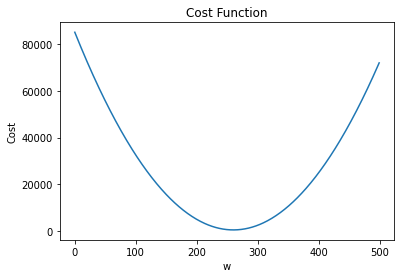

In [101]:
plot_costfunction(x_data,y_data)


# 3. Gradient descent
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

In [102]:
#Gradient Descent
# A specific w's differential
def gradient_function(x, y, w):
    N = len(x)
    dj_dw = 0

    for i in range(N):
        f_wb = w * x[i]
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_dw += dj_dw_i
    dj_dw = dj_dw / N
    
    return dj_dw        

In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  


Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

In [103]:
def Gradient_Descent(x, y , w_init, lr, iteration):

    #For drawing figure, do not care
    cost_history = []
    w_history = []
    #Start Here
    w = w_init

    for num in range(iteration):
        dj_dw = gradient_function(x ,y, w)
        w = w - dj_dw * lr

        #For drawing figure, do not care
        cost = Cost_function(x,y,w)
        cost_history.append(cost)
        w_history.append(w)
        
        if (num % 10 == 0):
            print(f"Iter:{num:4}, Cost : {cost:0.4e}, "
                  f"dj_dw : {dj_dw:0.3e}, w : {w:0.3e}")
                  

    return w,cost,w_history,cost_history

# 4. Modulation Part
lr : learning rate \
iteration : the total amount of trainig \
You can justify lr and iteration to see the ultimate effect

Iter:   0, Cost : 8.0828e+04, dj_dw : -6.500e+02, w : 6.500e+00
Iter:  10, Cost : 4.8913e+04, dj_dw : -5.046e+02, w : 6.320e+01
Iter:  20, Cost : 2.9678e+04, dj_dw : -3.917e+02, w : 1.072e+02
Iter:  30, Cost : 1.8085e+04, dj_dw : -3.041e+02, w : 1.414e+02
Iter:  40, Cost : 1.1098e+04, dj_dw : -2.361e+02, w : 1.679e+02
Iter:  50, Cost : 6.8874e+03, dj_dw : -1.833e+02, w : 1.885e+02
Iter:  60, Cost : 4.3496e+03, dj_dw : -1.423e+02, w : 2.045e+02
Iter:  70, Cost : 2.8201e+03, dj_dw : -1.105e+02, w : 2.169e+02
Iter:  80, Cost : 1.8983e+03, dj_dw : -8.576e+01, w : 2.266e+02
Iter:  90, Cost : 1.3427e+03, dj_dw : -6.658e+01, w : 2.340e+02


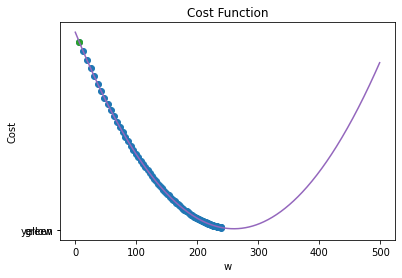

In [108]:
w_init = 0
lr = 0.01
iteration  = 100
w_new,cost_new,w_history,cost_history = Gradient_Descent(x_data,y_data,w_init,lr,iteration)
plot_gradient(x_data,y_data,w_history,cost_history)


In [105]:
w_history


[520.0, 0.0, 520.0, 0.0, 520.0, 0.0, 520.0, 0.0, 520.0, 0.0]